# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# your code here
xr = pd.read_csv("exch_rates.csv")
xr['Frequency'] = pd.to_datetime(xr['Frequency'])
xr.set_index('Frequency', inplace=True)

Plot the three exchange rates in one plot

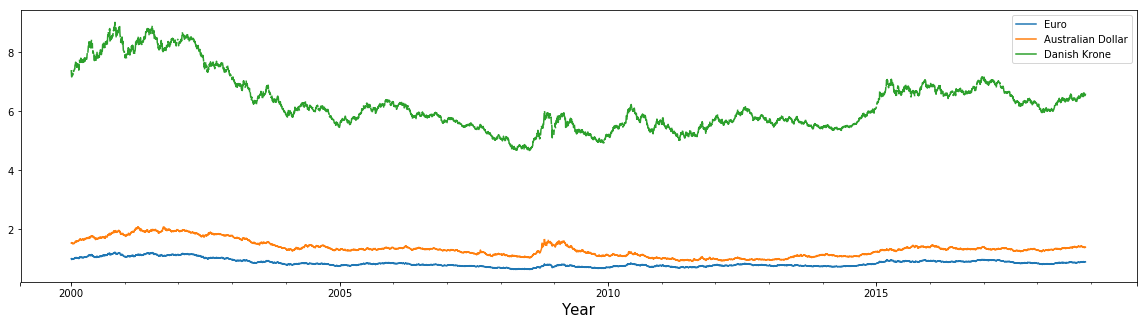

In [3]:
# your code here
xr.plot(figsize=(20,5))
plt.xlabel('Year', fontsize=15);

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [4]:
# your code here
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rate for the Euro and the Danish Krone has the highest correlation at 0.999952. The exchangerateforthe Australian Dollar and the Danish Krone is lower at 0.882513. The exchange rate for the Euro and the Australian Dollar is lowest at 0.883181. The reason for the extremely high correlation between the Danish Krone and the Euro is because the Danish Krone is pegged to the Euro.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [6]:
# your code here
xr_diff = xr.diff(periods=1)

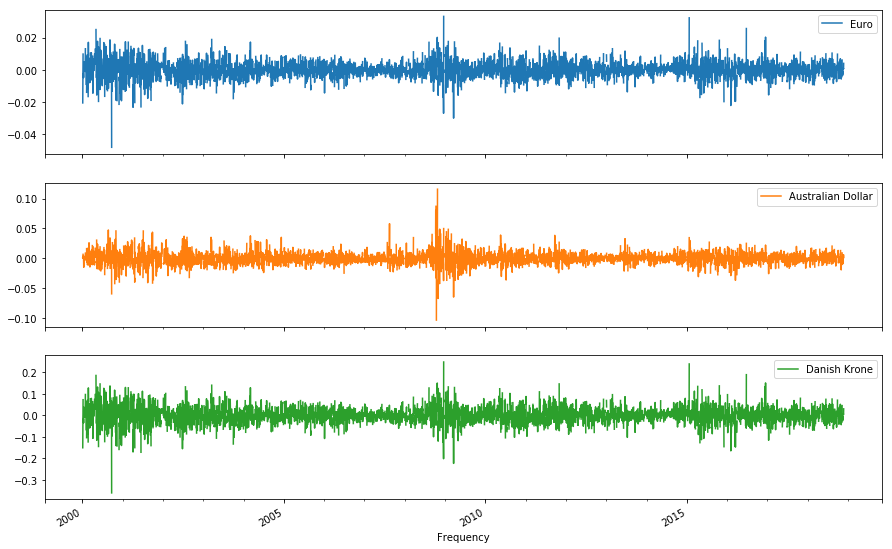

In [7]:
# your code here
xr_diff.plot(figsize = (15,10), subplots=True, legend=True);

In [8]:
# your code here
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

After differencing, the Euro-Danish Krone correlation reduces slightly to 0.999667, the Euro-Australian Dollar correlation reduces sizably to 0.545369 and the Australian Dollar-Danish Krone reduces sizably to 0.545133. Differencing removes levels in the time series and removes trends and seasonality. With the time series moving in the same direction on a daily basis without seasonality we can expect lower correlation values.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [9]:
# your code here
euro = xr[['Euro']]

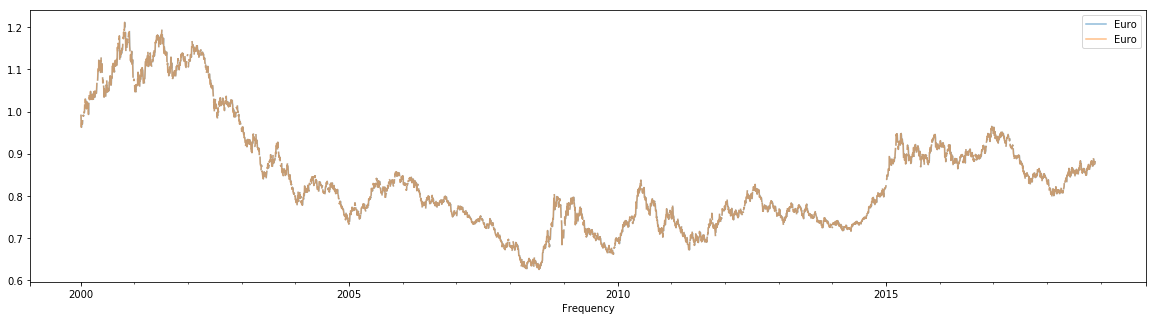

In [10]:
# your code here
euro_lag1 = euro.shift(periods=1)
euro_lag1.head()
euro_lag1_ac = pd.concat([euro_lag1, euro], axis=1)
euro_lag1_ac.plot(figsize=(20,5), alpha=0.5);

In [11]:
# your code here
euro_lag1_ac.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

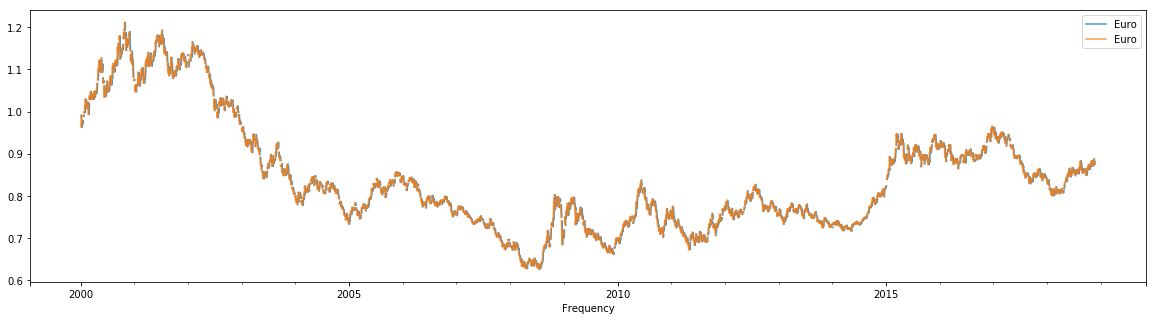

In [12]:
# your code here
euro_lag5 = euro.shift(periods=5)
euro_lag5.head()
euro_lag5_ac = pd.concat([euro_lag5, euro], axis=1)
euro_lag5_ac.plot(figsize=(20,5), alpha=0.8);

In [13]:
# your code here
euro_lag5_ac.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


### What's your conclusion here?

For lag 1 and lag 5 time series autocorrelation is very high. This is due to using random walk models in these time series. Random walks are recursive with values dependent on the previous value.

Knowing this, let's plot the ACF now.

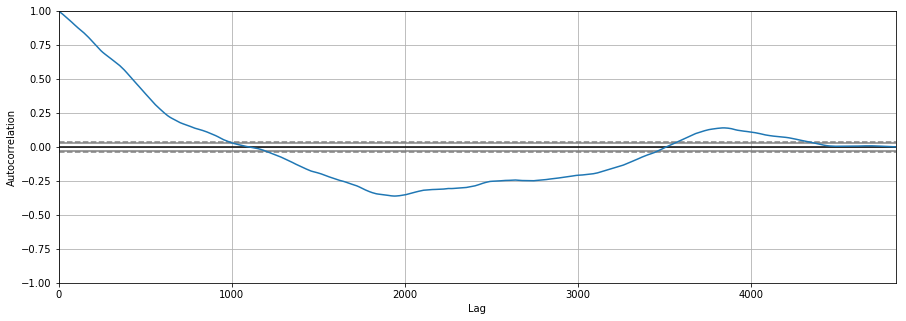

In [15]:
# your code here
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

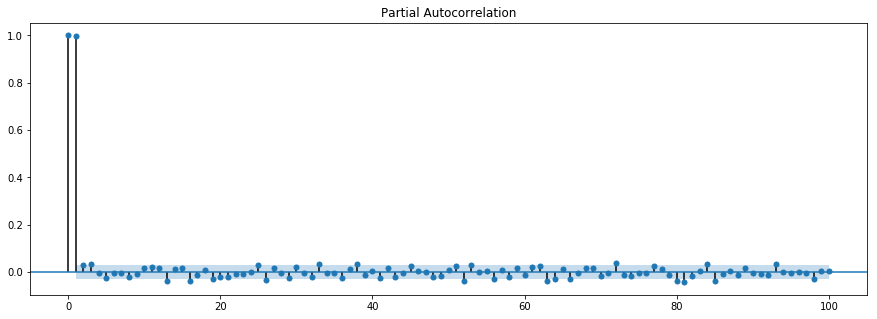

In [16]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [19]:
# your code here
passengers = pd.read_csv('passengers.csv')
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month', inplace = True)

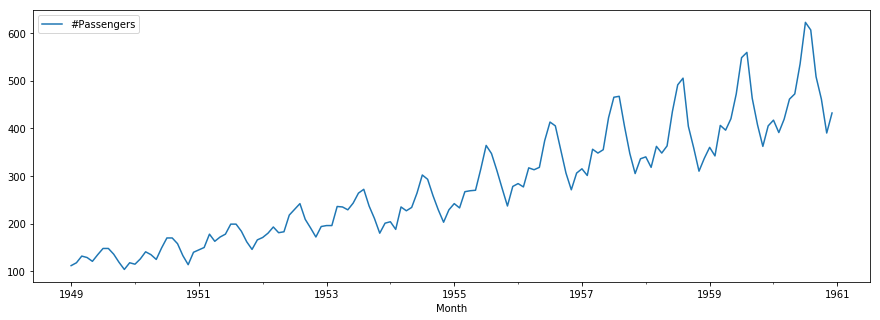

In [22]:
# your code here
passengers.plot()

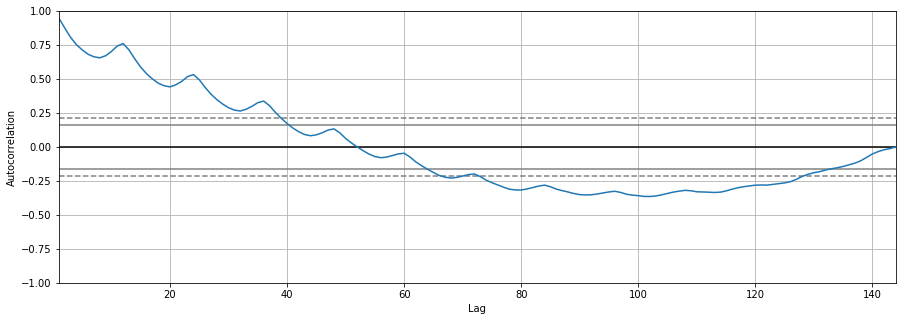

In [23]:
# your code here
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(passengers)

C:\Users\IBM\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


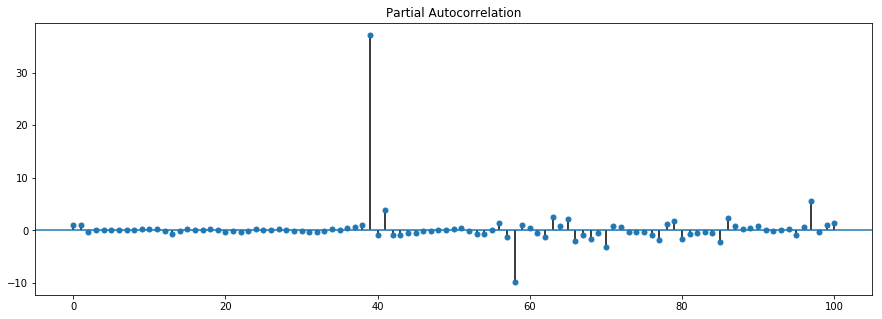

In [24]:
# your code here
rcParams['figure.figsize'] = 15, 5
plot_pacf(passengers.dropna(), lags = 100);

In [25]:
# your code here
passengers_diff = passengers.diff(periods=1)

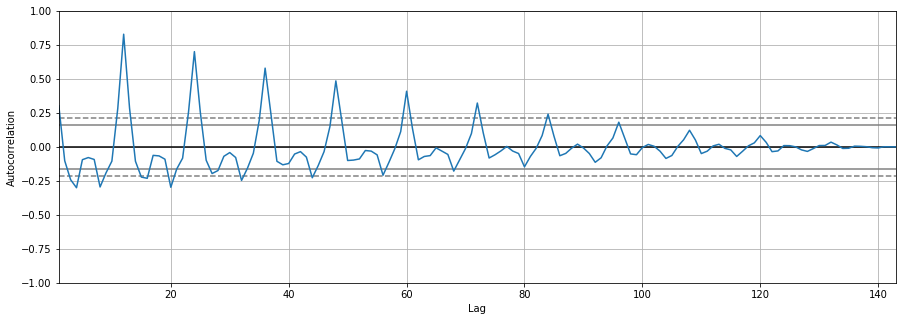

In [26]:
# your code here
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(passengers_diff.dropna())

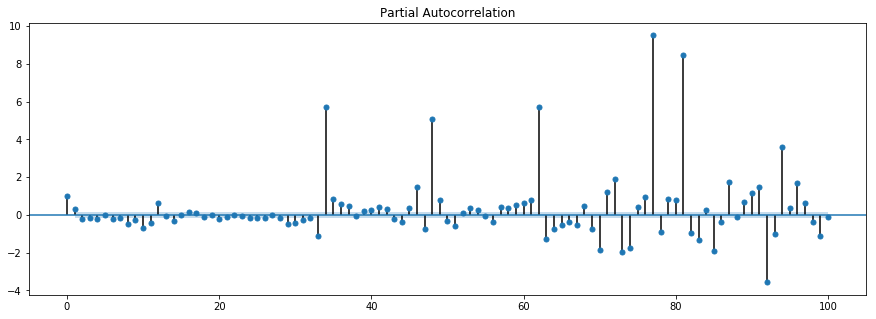

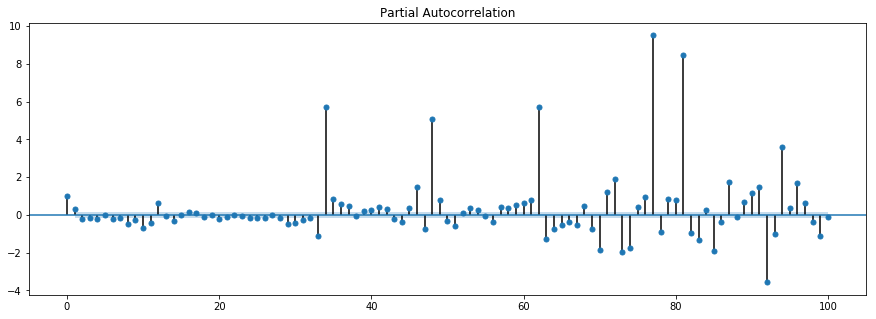

In [28]:
# your code here
rcParams['figure.figsize'] = 15, 5
plot_pacf(passengers_diff.dropna(), lags = 100)

### Your conclusion here

Seasonality can be seen in the differenced passengers time series ACF with a peak near lag 15. The ACF for the passengers time series has slight undulations while decreasing in value across the lag axis. The PACF has one strong correlation in the passengers time series near lag 40. The PACF has many strong correlations in the differenced passengers time series. 

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [29]:
# your code here
nyse = pd.read_csv("NYSE_monthly.csv")
month = 'Month'
nyse[month] = pd.to_datetime(nyse[month])
nyse.set_index(month, inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


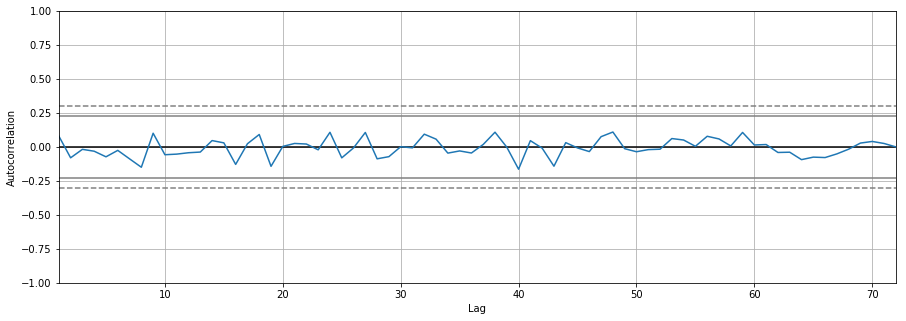

In [30]:
# your code here
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(nyse.dropna());

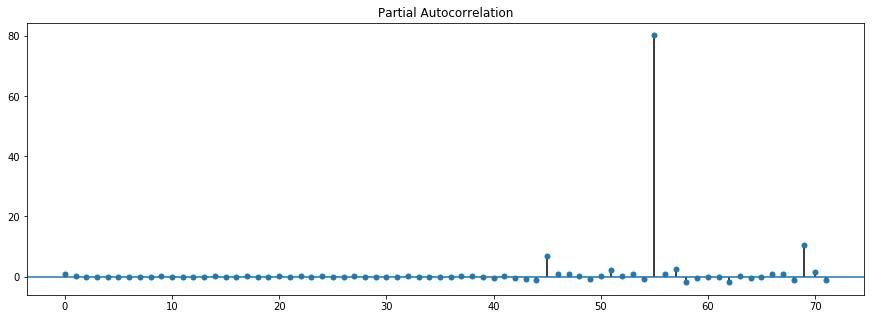

In [32]:
# your code here
rcParams['figure.figsize'] = 15, 5
plot_pacf(nyse, lags = 100);

## Your conclusion here

The ACF and PACF are near 0 for all lags with the excepton of near lag 55 for the PACF. This is due to the NYSE series usin ga white noise model forcing a lack of trending.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!